<a href="https://colab.research.google.com/github/TatianeSousas/PUCRIO-MVP-QualidadeSoftware/blob/main/MVP4_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Engenharia de Sistemas de Software Inteligentes - Tatiane Aparecida de Sousa  
## Sobre este arquivo
## Contém um grande número de informações anônimas relacionadas ao paciente,  incluindo pré-condições. O conjunto de dados brutos consiste em 15 recursos  diferentes e 9999 pacientes únicos. Nos recursos booleanos, 1 significa “sim” e 2 significa “não”.

Sexo: 1 para feminino e 2 para masculino.
Idade: do paciente.
Morto = 0 significa Vivo, 1 significa morto.
Tipo de paciente: tipo de atendimento que o paciente recebeu na unidade. 1 por retorno para casa e 2 por internação.
Pneumonia: se o paciente já apresenta inflamação dos sacos aéreos ou não.
Gravidez: se a paciente está grávida ou não.
Diabetes: se o paciente tem diabetes ou não.
Asma: se o paciente tem asma ou não.
Hipertensão: se o paciente tem hipertensão ou não.
Cardiovascular: se o paciente tem doenças relacionadas ao coração ou aos vasos sanguíneos.
Renal: se o paciente tem doença renal crônica ou não.
Obesidade: se o paciente é obeso ou não.
Tabaco: se o paciente é usuário de tabaco.
UTI: Indica se o paciente foi internado em Unidade de Terapia Intensiva.
classificação: Os valores 1 significam que o paciente foi diagnosticado com covid e 2 significa que o paciente foi diagnosticado sem covid.


In [9]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset

In [11]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/TatianeSousas/PUCRIO-MVP-QualidadeSoftware/main/Covid.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,Sexo,TipoAtendimento,Morto,Intubado,Pneumonia,Idade,Gravidez,Diabetes,Asma,Hipertenso,Cardiovascular,Obesidade,Renal,Tabaco,UTI,ClassificacaoFinal
0,1,1,0,1,1,65,2,2,2,1,2,2,2,2,1,2
1,2,1,0,1,1,72,1,2,2,1,2,1,1,2,1,2
2,2,2,0,1,2,55,1,1,2,2,2,2,2,2,2,2
3,1,1,0,1,2,53,2,2,2,2,2,2,2,2,1,1
4,2,1,0,1,2,68,1,1,2,1,2,2,2,2,1,2


## Separação em conjunto de treino e conjunto de teste com holdout

In [16]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:6]
y = array[:,15]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

#X_train
df = pd.DataFrame(X_test)
df.head()


,0,1,2,3,4,5
0,1,1,0,1,2,56
1,1,1,0,1,2,25
2,2,1,0,1,2,39
3,1,2,1,1,1,80
4,2,2,0,2,2,55


## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.941868 (0.006253)
CART: 0.951618 (0.008631)
NB: 0.958494 (0.007582)
SVM: 0.876235 (0.000046)


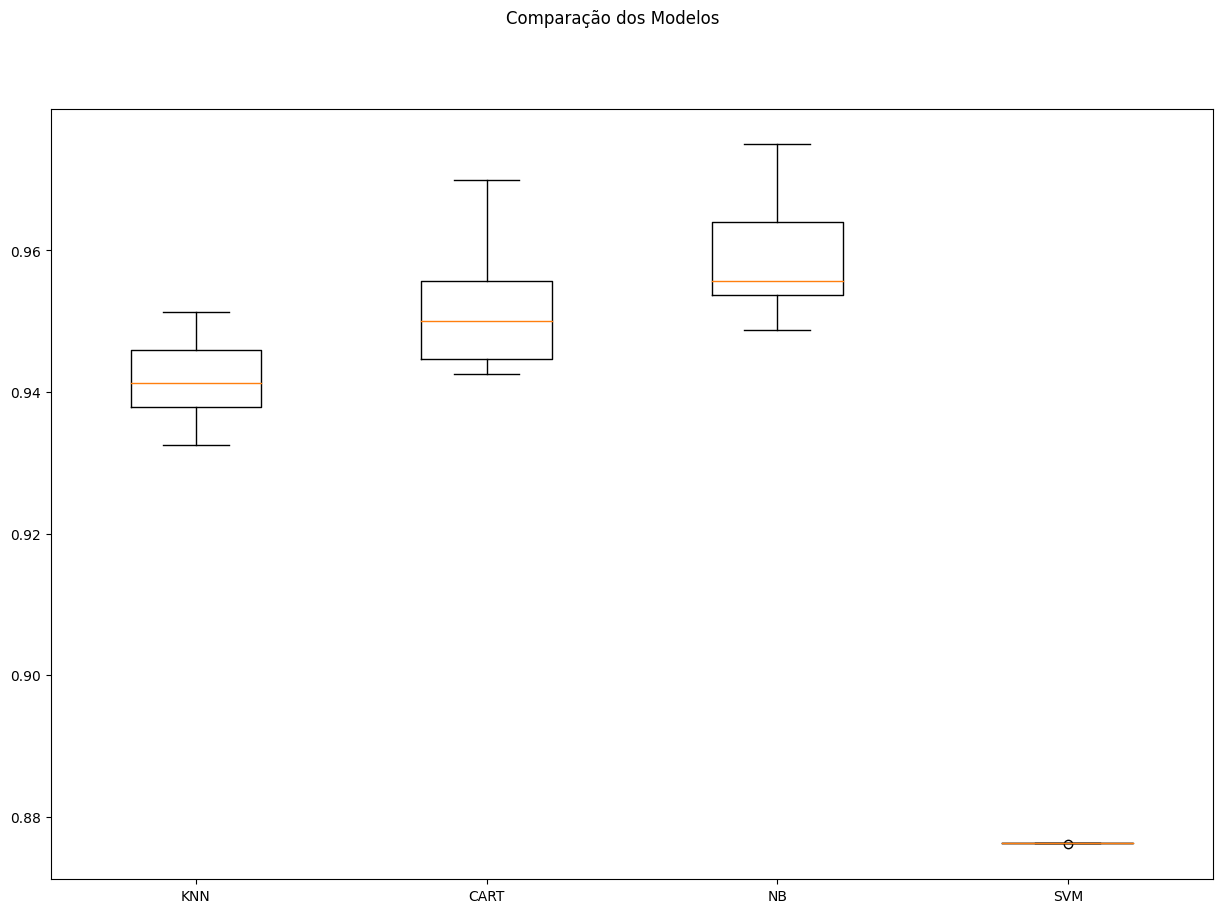

In [17]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.942 (0.006)
CART-orig: 0.952 (0.009)
NB-orig: 0.958 (0.008)
SVM-orig: 0.876 (0.000)
KNN-padr: 0.956 (0.008)
CART-padr: 0.951 (0.008)
NB-padr: 0.958 (0.008)
SVM-padr: 0.958 (0.007)
KNN-norm: 0.956 (0.007)
CART-norm: 0.952 (0.009)
NB-norm: 0.958 (0.008)
SVM-norm: 0.958 (0.008)


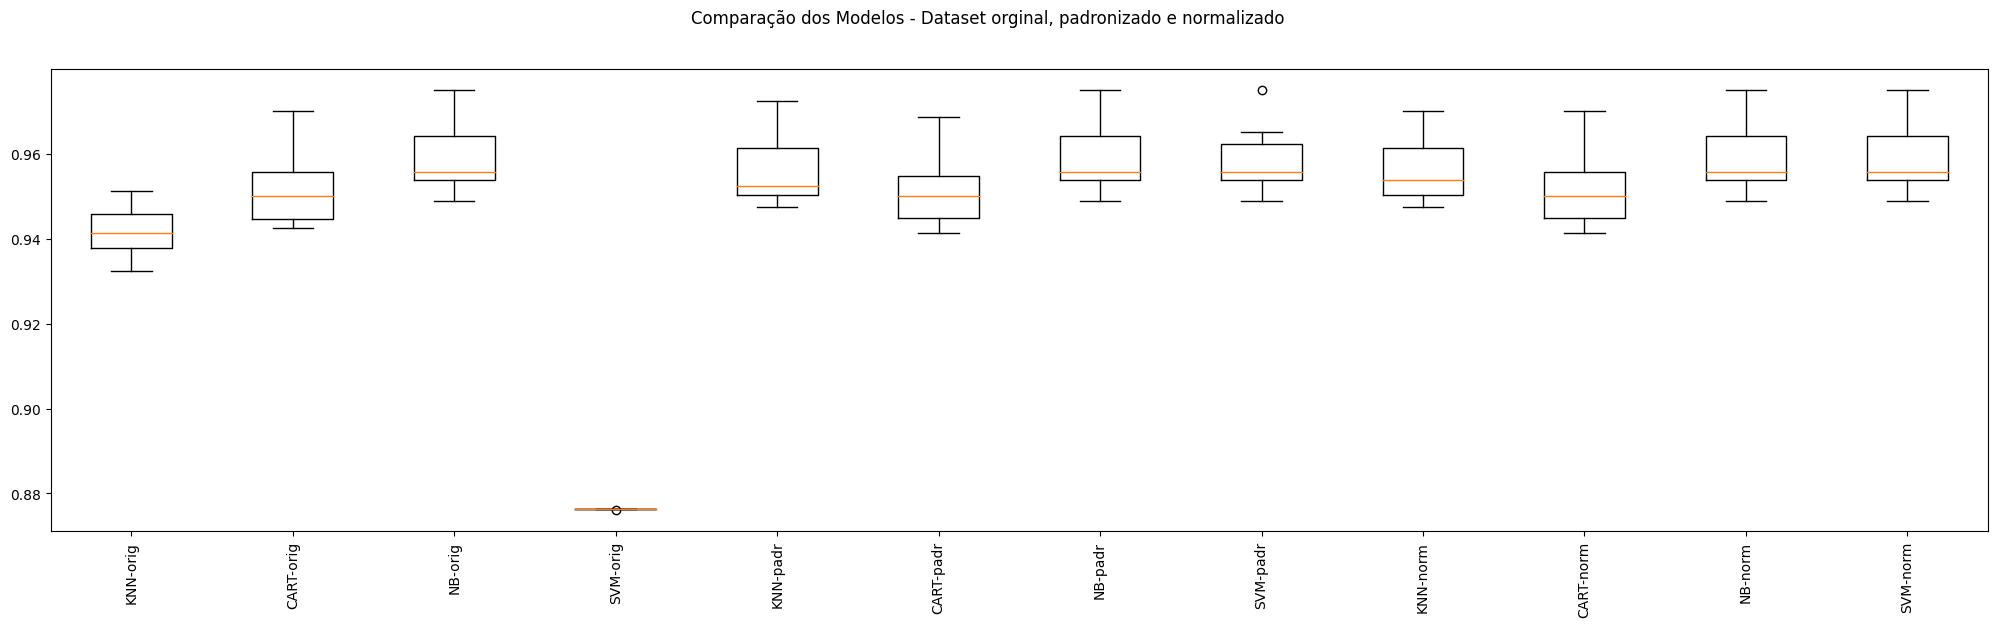

In [18]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [28]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Modelo: knn-orig - Melhor: 0.943244 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Modelo: knn-padr - Melhor: 0.958369 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 17}
Modelo: knn-norm - Melhor: 0.957619 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 13}


## Finalização do Modelo

In [32]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=13)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.959


In [33]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=13)

## Simulando a aplicação do modelo em dados não vistos

In [38]:
# Novos dados - não sabemos a classe!
data = {'Sexo':  [1, 2, 1],
        'Morto': [1, 0, 1],
        'Intubado': [1, 2, 1],
        'Pneumonia': [2, 1, 1],
        'Gravidez': [1, 0, 1],
        'Diabetes': [1, 2, 1],
        'Asma': [1, 1, 2],
        'Idade': [48, 60, 40],
        }

atributos = ['Sexo', 'Morto', 'Intubado', 'Pneumonia', 'Gravidez', 'Diabetes', 'Asma', 'Idade']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:6].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-1.01562358 -0.70456246  3.3390797   1.6593307  -1.39782486 -2.72509532]
 [ 0.98461676 -2.8284455   6.97764311 -0.60265262 -3.51104692 -2.66467783]
 [-1.01562358 -0.70456246  3.3390797  -0.60265262 -1.39782486 -2.72509532]]


In [39]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 1 1]
